# Loan Prediction

Among all industries, the insurance domain has one of the largest uses of analytics & data science methods. This dataset provides you a taste of working on data sets from insurance companies – what challenges are faced there, what strategies are used, which variables influence the outcome, etc. This is a classification problem. The data has 615 rows and 13 columns.

**Problem:** Predict if a loan will get approved or not.

## 1. Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Read in the dataset
df = pd.read_csv("train.csv")

### Quick Data Exploration

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [12]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [15]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution analysis

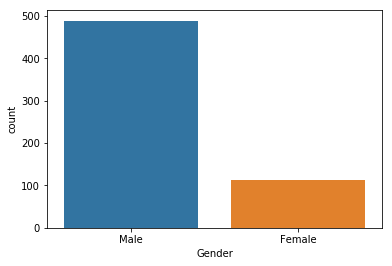

In [16]:
sns.countplot(x='Gender', data=df)

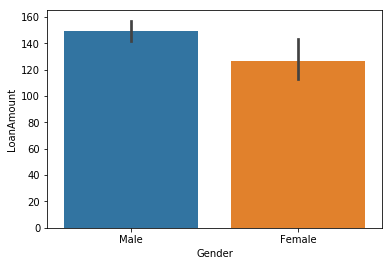

In [17]:
sns.barplot(x='Gender', y='LoanAmount', data=df)

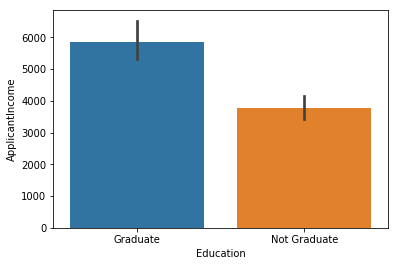

In [18]:
sns.barplot(x='Education', y='ApplicantIncome', data=df)

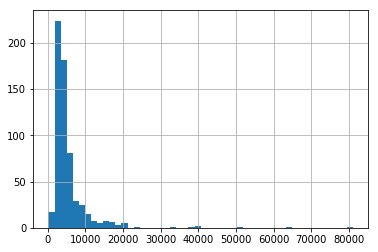

In [19]:
df['ApplicantIncome'].hist(bins=50)

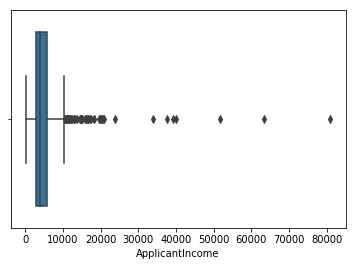

In [20]:
sns.boxplot(x='ApplicantIncome', data=df)

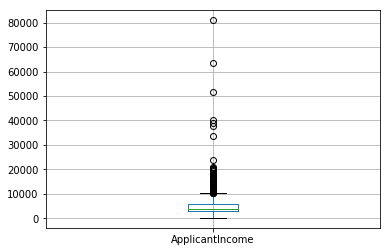

In [21]:
df.boxplot(column='ApplicantIncome')

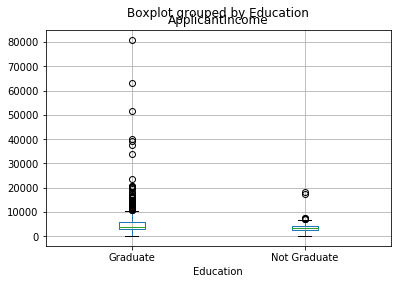

In [22]:
df.boxplot(column='ApplicantIncome', by='Education')

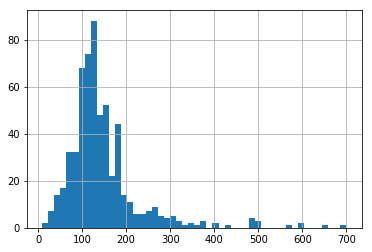

In [23]:
df['LoanAmount'].hist(bins=50)

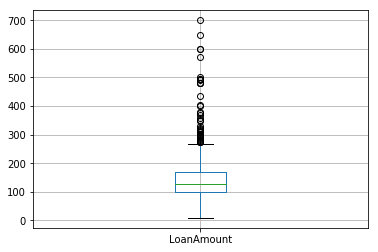

In [24]:
df.boxplot(column='LoanAmount')

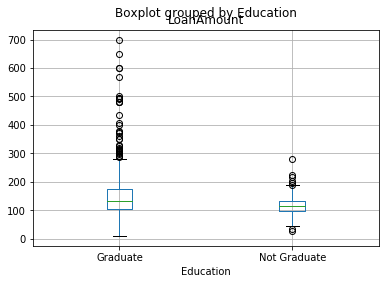

In [25]:
df.boxplot(column='LoanAmount', by='Education')

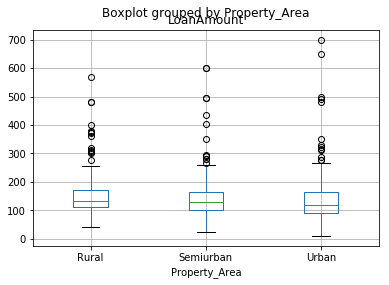

In [26]:
df.boxplot(column='LoanAmount', by='Property_Area')

### Categorical variable analysis

Loan_Status by Credit_History

In [27]:
trans = lambda x: x.map({'Y':1,'N':0})
df['Loan_Status_n'] = trans(df['Loan_Status'])

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_n
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [29]:
ch1 = df['Credit_History'].value_counts(ascending=True)
print ('Frequency Table for Credit History:') 
print (ch1)

ch2 = df.pivot_table(values='Loan_Status_n',index=['Credit_History'],aggfunc=np.mean)
print ('\nProbility of getting loan for each Credit History class:') 
print (ch2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status_n
Credit_History               
0.0                  0.078652
1.0                  0.795789


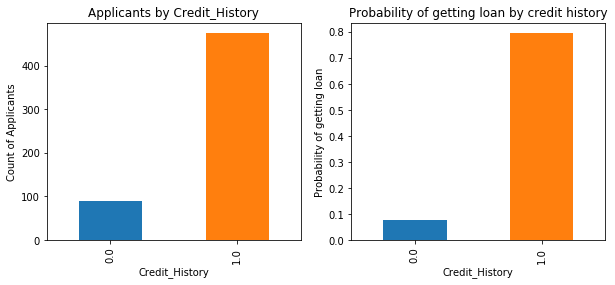

In [30]:
# Plot as a bar chart 
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
ch1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
ch2['Loan_Status_n'].plot(kind='bar')

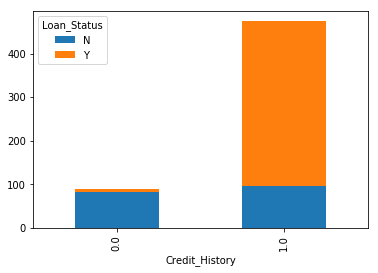

In [31]:
ch3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
ch3.plot(kind='bar', stacked=True)

Loan_Status by Self_Employed

In [32]:
se1 = df['Self_Employed'].value_counts()
print ('Frequency Table for Self Employed:') 
print (se1)

se2 = df.pivot_table(values='Loan_Status_n',index=['Self_Employed'],aggfunc=np.mean)
print ('\nProbility of getting loan for each Self Employed class:') 
print (se2)

Frequency Table for Self Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64

Probility of getting loan for each Self Employed class:
               Loan_Status_n
Self_Employed               
No                  0.686000
Yes                 0.682927


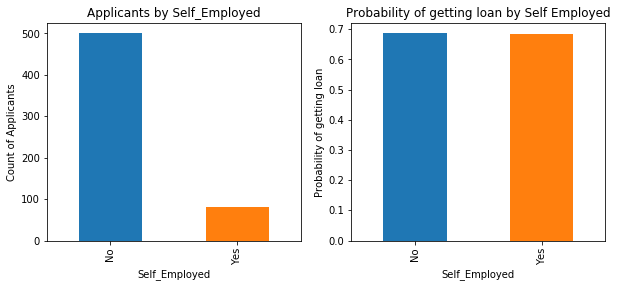

In [33]:
# Plot as a bar chart 
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Self_Employed')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Self_Employed")
se1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Self_Employed')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by Self Employed")
se2['Loan_Status_n'].plot(kind='bar')

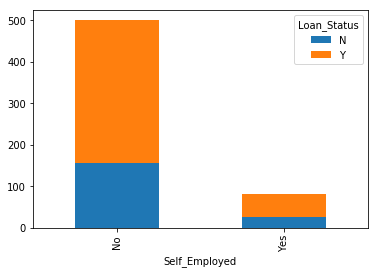

In [34]:
se3 = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
se3.plot(kind='bar', stacked=True)

Loan_Status by Property_Area

In [35]:
pa1 = df['Property_Area'].value_counts().sort_index()
print ('Frequency Table for Property Area:') 
print (pa1)

pa2 = df.pivot_table(values='Loan_Status_n',index=['Property_Area'],aggfunc=np.mean)
print ('\nProbility of getting loan for each Property Area:') 
print (pa2)

Frequency Table for Property Area:
Rural        179
Semiurban    233
Urban        202
Name: Property_Area, dtype: int64

Probility of getting loan for each Property Area:
               Loan_Status_n
Property_Area               
Rural               0.614525
Semiurban           0.768240
Urban               0.658416


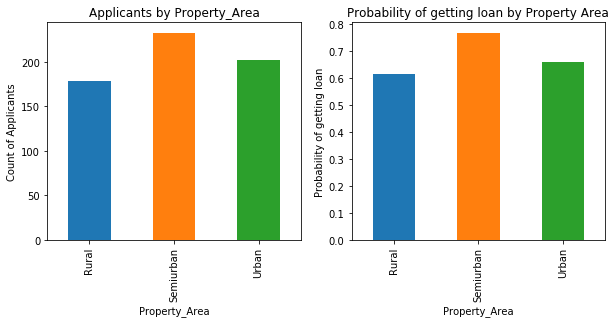

In [36]:
# Plot as a bar chart 
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Property_Area')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Property_Area")
pa1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Property_Area')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by Property Area")
pa2['Loan_Status_n'].plot(kind='bar')

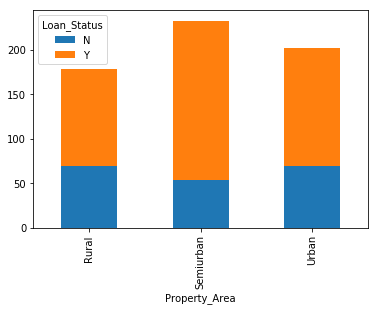

In [37]:
pa3 = pd.crosstab(df['Property_Area'], df['Loan_Status'])
pa3.plot(kind='bar', stacked=True)

Loan_Status by Education

In [38]:
ed1 = df['Education'].value_counts().sort_index()
print ('Frequency Table for Education:') 
print (ed1)

ed2 = df.pivot_table(values='Loan_Status_n',index=['Education'],aggfunc=np.mean)
print ('\nProbility of getting loan for each Education class:') 
print (ed2)

Frequency Table for Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Probility of getting loan for each Education class:
              Loan_Status_n
Education                  
Graduate           0.708333
Not Graduate       0.611940


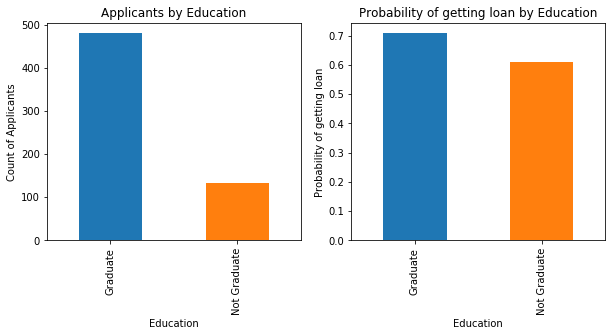

In [39]:
# Plot as a bar chart 
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Education')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Education")
ed1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Education')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by Education")
ed2['Loan_Status_n'].plot(kind='bar')

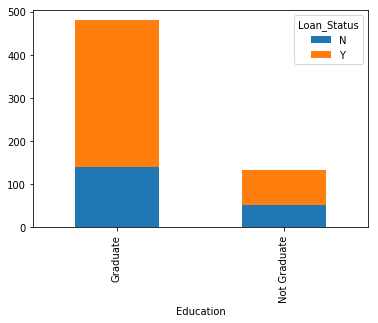

In [40]:
ed3 = pd.crosstab(df['Education'], df['Loan_Status'])
ed3.plot(kind='bar', stacked=True)

Loan_Status by Dependents

In [41]:
dp1 = df['Dependents'].value_counts().sort_index()
print ('Frequency Table for Dependents:') 
print (dp1)

dp2 = df.pivot_table(values='Loan_Status_n',index=['Dependents'],aggfunc=np.mean)
print ('\nProbility of getting loan for each Dependents class:') 
print (dp2)

Frequency Table for Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Probility of getting loan for each Dependents class:
            Loan_Status_n
Dependents               
0                0.689855
1                0.647059
2                0.752475
3+               0.647059


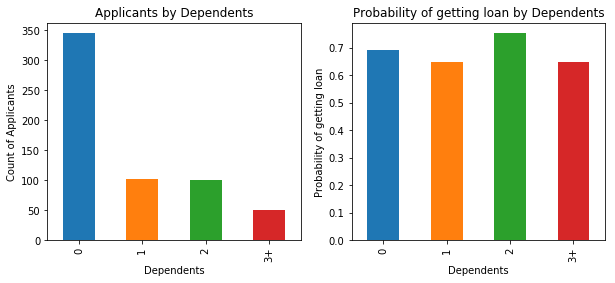

In [42]:
# Plot as a bar chart 
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Dependents')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Dependents")
dp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Dependents')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by Dependents")
dp2['Loan_Status_n'].plot(kind='bar')

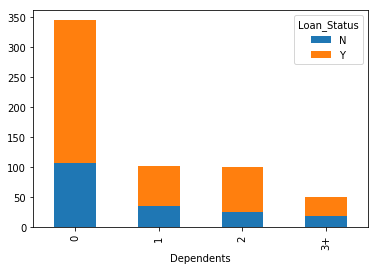

In [43]:
dp3 = pd.crosstab(df['Dependents'], df['Loan_Status'])
dp3.plot(kind='bar', stacked=True)

## 2. Data Wrangling

### Check missing values in the dataset

In [44]:
# Look at missing values in all the variables
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Loan_Status_n         0
dtype: int64

### Fill missing values

In [45]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [46]:
# Fill missing values in Gender
df['Gender'].fillna('Male',inplace=True)

In [47]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [48]:
# Fill missing values in Married
df['Married'].fillna('Yes',inplace=True)

In [49]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [50]:
# Fill missing values in Dependents
df['Dependents'].fillna('0',inplace=True)

In [51]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [52]:
# Fill missing values in Self_Employed
df['Self_Employed'].fillna('No',inplace=True)

In [53]:
# Fill missing values in LoanAmount

table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [54]:
df['Loan_Amount_Term'].mean()

342.0

In [55]:
# Fill missing values in Loan_Amount_Term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [56]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [57]:
(df['Credit_History']==df['Loan_Status_n']).value_counts()

True     460
False    154
dtype: int64

In [58]:
# Fill missing values in Credit_History
df['Credit_History'].fillna(1,inplace=True)

In [59]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loan_Status_n        0
dtype: int64

### Treat for extreme values

Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

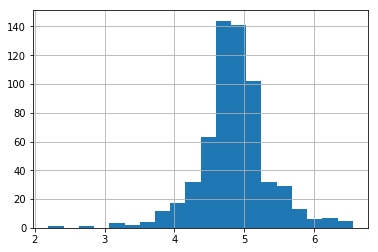

In [60]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

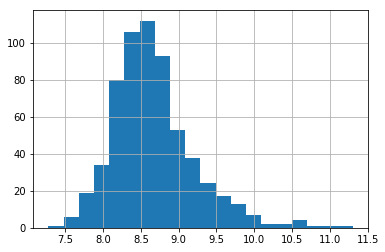

In [61]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

Now we see that the distribution is much better than before.

Create LoanRate for LoanAmount/TotalIncome to get an idea of how well the applicant is suited to pay back his loan.


In [62]:
df['LoanRate'] = df['LoanAmount']*1000 / df['TotalIncome']

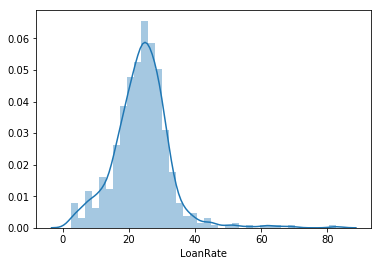

In [63]:
sns.distplot(df['LoanRate'])

## 3. Build Predictive Models

### Convert categorical variables into numeric ones

In [64]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for item in var_mod:
    df[item] = le.fit_transform(df[item])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
Loan_Status_n          int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
LoanRate             float64
dtype: object

In [65]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_n,LoanAmount_log,TotalIncome,TotalIncome_log,LoanRate
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,1,4.867534,5849.0,8.674026,22.226022
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,4.852030,6091.0,8.714568,21.014612
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1,4.189655,3000.0,8.006368,22.000000
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1,4.787492,4941.0,8.505323,24.286582
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1,4.948760,6000.0,8.699515,23.500000


### Define function for making model and accessing performance

In [66]:
# Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBClassifier
from sklearn import metrics

In [67]:
# Generic function for making a classification model and accessing performance:
def classification_model(model, X, y):
    # Fit the model:
    model.fit(X,y)
  
    # Make predictions on training set:
    predictions = model.predict(X)
    
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions,y)
    print ("Accuracy : {0:.3%}".format(accuracy))

    # Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
        # Training the algorithm using the predictors and target.
        model.fit(X_train, y_train)
    
        # Record error from each cross-validation run
        error.append(model.score(X_test, y_test))
 
    print ("Cross-Validation Score : {0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(X,y) 

### Logistic Regression

#### Model with ‘Credit_History’

In [68]:
model = LogisticRegression()
X = df[['Credit_History']]
y = df['Loan_Status']
classification_model(model, X, y)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


#### Model with more variables

In [69]:
# We can try different combination of variables:
X = df[['Credit_History','Education','Married','Self_Employed','Property_Area']]
classification_model(model, X, y)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


The accuracy and cross-validation score are not getting impacted by less important variables. Credit_History is dominating the mode.

### Decision Tree

In [70]:
model = DecisionTreeClassifier()
X = df[['Credit_History','Gender','Married','Education']]
classification_model(model, X, y)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [71]:
# We can try different combination of variables:
X = df[['Credit_History','Loan_Amount_Term','LoanAmount_log']]
classification_model(model, X, y)

Accuracy : 88.925%
Cross-Validation Score : 68.883%


Although the accuracy went up on adding variables, the cross-validation error went down. This is the result of model over-fitting the data.

In [72]:
X = df[['Credit_History','TotalIncome_log','LoanAmount_log']]
classification_model(model, X, y)

Accuracy : 100.000%
Cross-Validation Score : 71.008%


### Random Forest

In [73]:
model = RandomForestClassifier(n_estimators=100)
X = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']]
classification_model(model, X, y)

Accuracy : 100.000%
Cross-Validation Score : 78.179%


The accuracy is 100% for the training set. This is the ultimate case of overfitting

#### The feature importance matrix

In [74]:
# Create a series with feature importances:
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.271792
TotalIncome_log     0.265112
LoanAmount_log      0.228732
Dependents          0.053545
Property_Area       0.046945
Loan_Amount_Term    0.042955
Education           0.024813
Married             0.024400
Gender              0.021239
Self_Employed       0.020468
dtype: float64


In [77]:
# Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
X = df[predictor_var]
classification_model(model, X, y)

Accuracy : 82.248%
Cross-Validation Score : 80.622%


Although accuracy reduced, but the cross-validation score is improving. So the model is generalizing well. 

### XGboost

In [81]:
model = XGBClassifier()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
X = df[predictor_var]
classification_model(model, X, y)

Accuracy : 86.319%
Cross-Validation Score : 80.297%


/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151

In [82]:
model = XGBClassifier()
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
X = df[predictor_var]
classification_model(model, X, y)

Accuracy : 85.505%
Cross-Validation Score : 80.457%


/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151

### Predict with the test dataset

In [ ]:
test = pd.read_csv("test.csv")